# 0 Loading packages <a name="loading"></a> 

In [1]:
import sys
print(sys.executable)
print(sys.path)
print(sys.version)

/home2/s418610/.conda/envs/py37_res_PAGA/bin/python
['/home2/s418610/jupyter_notebooks/Invivo_neuronal_reprogramming/Cluster_with_10x/Remapped_10X_data/Harmony.4', '', '/cm/shared/apps/cnvkit/0.9.5/lib/python3.6/site-packages', '/cm/shared/apps/python/3.6.4-anaconda/lib', '/cm/shared/apps/jupyterkernel-matlab/0.16.1/lib/python3.6/site-packages', '/cm/shared/apps/python/2.7.x-anaconda/lib', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python37.zip', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/lib-dynload', '/home2/s418610/.local/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/fa2-0.3.5-py3.7-linux-x86_64.egg', '/home2/s418610/.conda/envs/py37_res_PAGA/lib/python3.7/site-packages/IPython/extensions', '/home2/s418610/.ipython']
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [2]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import sklearn.manifold
import statsmodels.api as sm

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

import scanpy as sc
import harmonypy as hm

import pickle

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
# plt.rcParams["axes.grid"] = False
sc.settings.verbosity = 3

# sc.set_figure_params(figsize=(8,8), fontsize=12)

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
print('sklearn', sklearn.__version__)
print('statsmodels', sm.__version__)
print('matplotlib', mpl.__version__)
print('seaborn', sns.__version__)

sc.logging.print_versions() # scanpy==1.4.5.post1, anndata==0.6.22.post1

!date +%F

numpy 1.17.2
pandas 0.25.2
scipy 1.3.1
sklearn 0.21.3
statsmodels 0.10.1
matplotlib 3.0.3
seaborn 0.9.0
scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
2020-08-03


In [4]:
import os

# set a working directory for saving plots
wdir = "/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/99.Manuscript/Figures_v2/"
os.chdir( wdir )

In [5]:
# A sub-directory for saving intermediate data for organized pipeline v1
data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/'

In [6]:
neural_data_dir = data_dir + 'NeuralOnly/'

## Q1 In experimental only analysis, what's different between resident astrocytes-1 and -2?

In [56]:
from itertools import compress

In [7]:
adata_experiment_neural = sc.read(neural_data_dir + 'BL41-42Only_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')

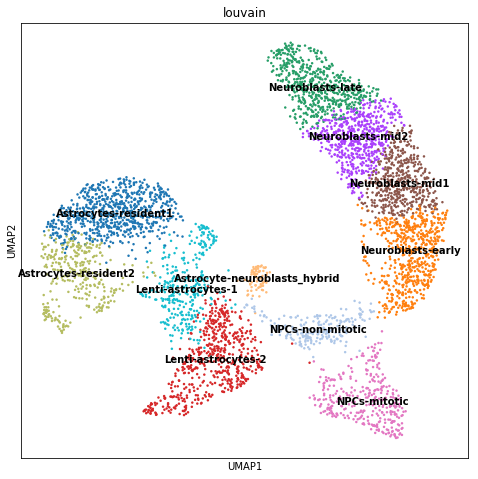

In [8]:
sc.pl.umap(adata_experiment_neural, color='louvain', legend_loc='on data')

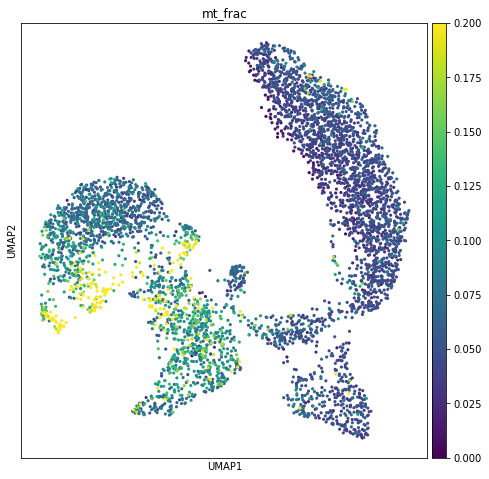

In [63]:
sc.pl.umap(adata_experiment_neural, color='mt_frac', vmax=0.2, size=40, 
          save='_BL41-42Only_mitoFrac.pdf')

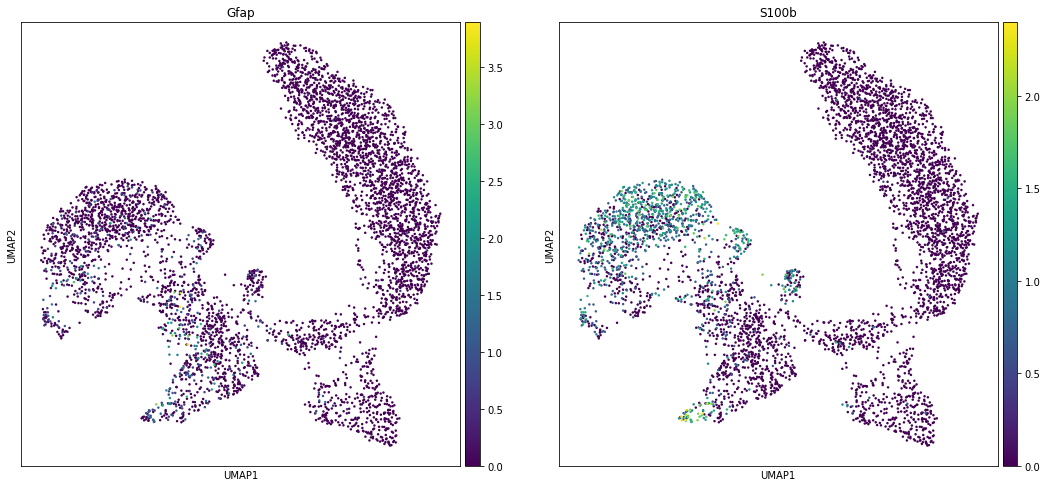

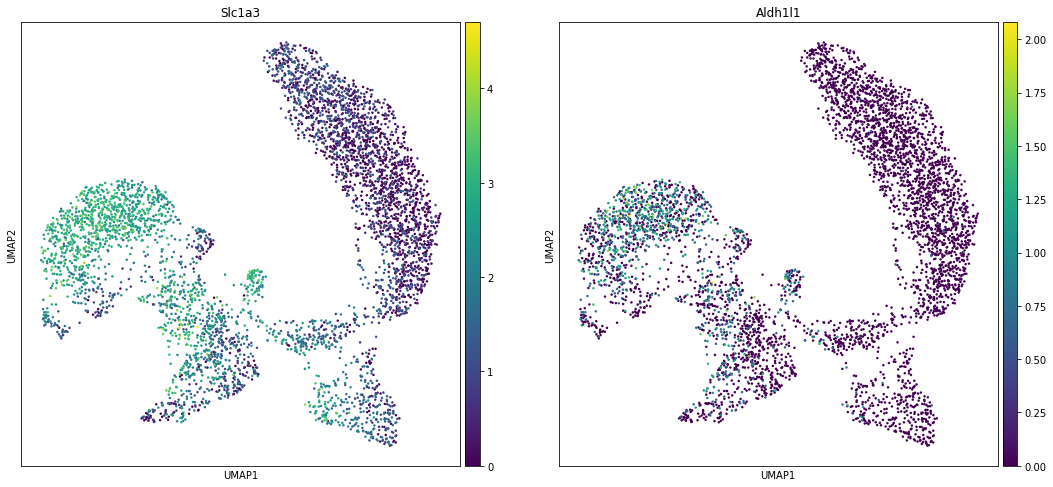

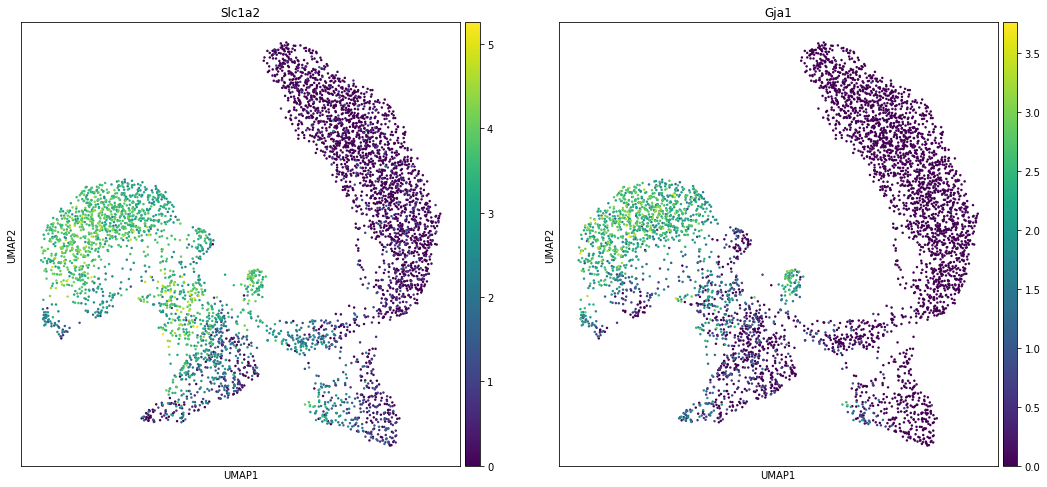

In [14]:
sc.pl.umap(adata_experiment_neural, color=['Gfap', 'S100b'], use_raw=True)
sc.pl.umap(adata_experiment_neural, color=['Slc1a3', 'Aldh1l1'], use_raw=True)
sc.pl.umap(adata_experiment_neural, color=['Slc1a2', 'Gja1'], use_raw=True)

In [31]:
adata_RA = adata_experiment_neural[adata_experiment_neural.obs['louvain'].isin(['Astrocytes-resident1', 'Astrocytes-resident2'])]

In [16]:
adata_RA

View of AnnData object with n_obs × n_vars = 1081 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [18]:
sc.tl.rank_genes_groups(adata_RA, 'louvain', groups='all', reference='rest', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


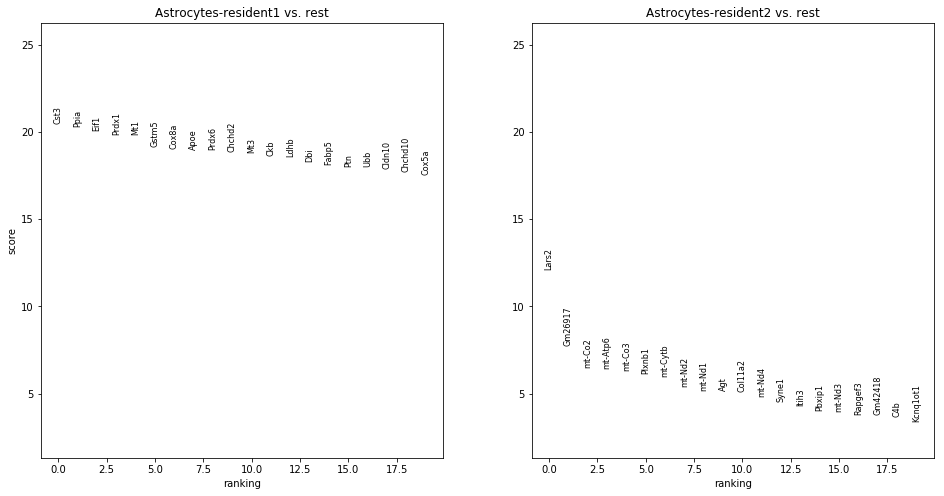

In [19]:
sc.pl.rank_genes_groups(adata_RA, n_genes=20, sharey=True)

In [23]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100)

Astrocytes-resident1 Astrocytes-resident2
0                  Cst3                Lars2
1                  Ppia              Gm26917
2                  Eif1               mt-Co2
3                 Prdx1              mt-Atp6
4                   Mt1               mt-Co3
..                  ...                  ...
95                 Il18                 Ddr1
96                Cmtm5                 Gli2
97                 Dad1                 Nebl
98               Ndufb4                Ptprs
99               Rpl27a                 Plp1

[100 rows x 2 columns]

In [24]:
DEG_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/outs/DEGs'

In [25]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100).to_csv(DEG_dir + '/louvain_BL41-42Only_DEGs_ResidentAstrocytesOnly.csv', index=False)

### Remove high mito cells

In [35]:
adata_RA = adata_RA[adata_RA.obs['mt_frac']<0.1]

In [36]:
adata_RA

View of AnnData object with n_obs × n_vars = 798 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

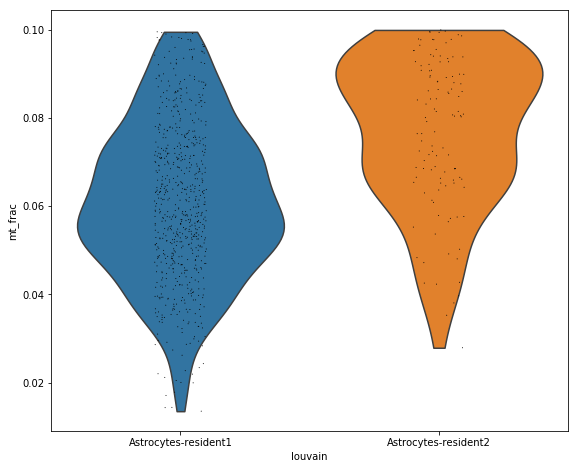

In [37]:
sc.pl.violin(adata_RA, keys='mt_frac', groupby='louvain')

In [38]:
sc.tl.rank_genes_groups(adata_RA, 'louvain', groups='all', reference='rest', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


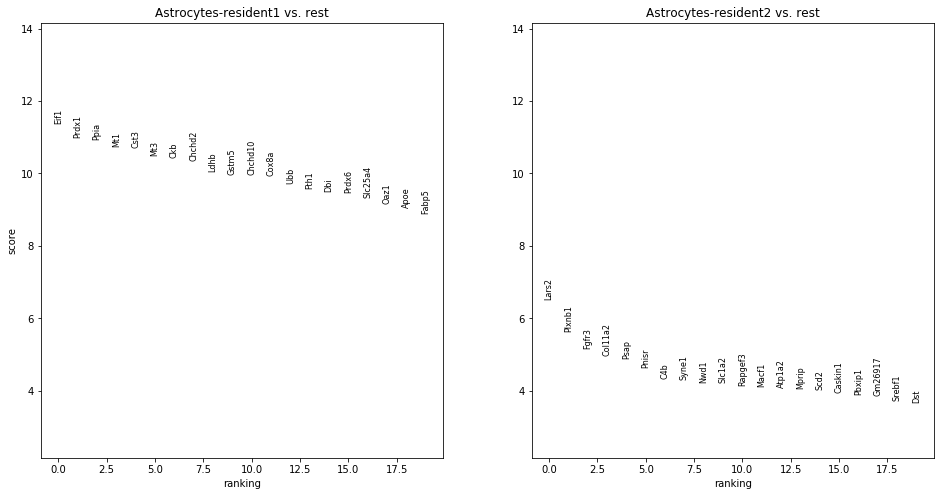

In [39]:
sc.pl.rank_genes_groups(adata_RA, n_genes=20, sharey=True)

In [40]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100)

Astrocytes-resident1 Astrocytes-resident2
0                  Eif1                Lars2
1                 Prdx1               Plxnb1
2                  Ppia                Fgfr3
3                   Mt1              Col11a2
4                  Cst3                 Psap
..                  ...                  ...
95        1810037I17Rik              Fam120b
96               Ndufb4                 Wsb1
97                 Bmyc           AC149090.1
98               Ndufb7               Bmpr1b
99               Rpl18a                Tenm3

[100 rows x 2 columns]

In [41]:
DEG_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/outs/DEGs'

In [42]:
pd.DataFrame(adata_RA.uns['rank_genes_groups']['names']).head(100).to_csv(DEG_dir + '/louvain_BL41-42Only_DEGs_ResidentAstrocytesOnly_lowMito.csv', index=False)

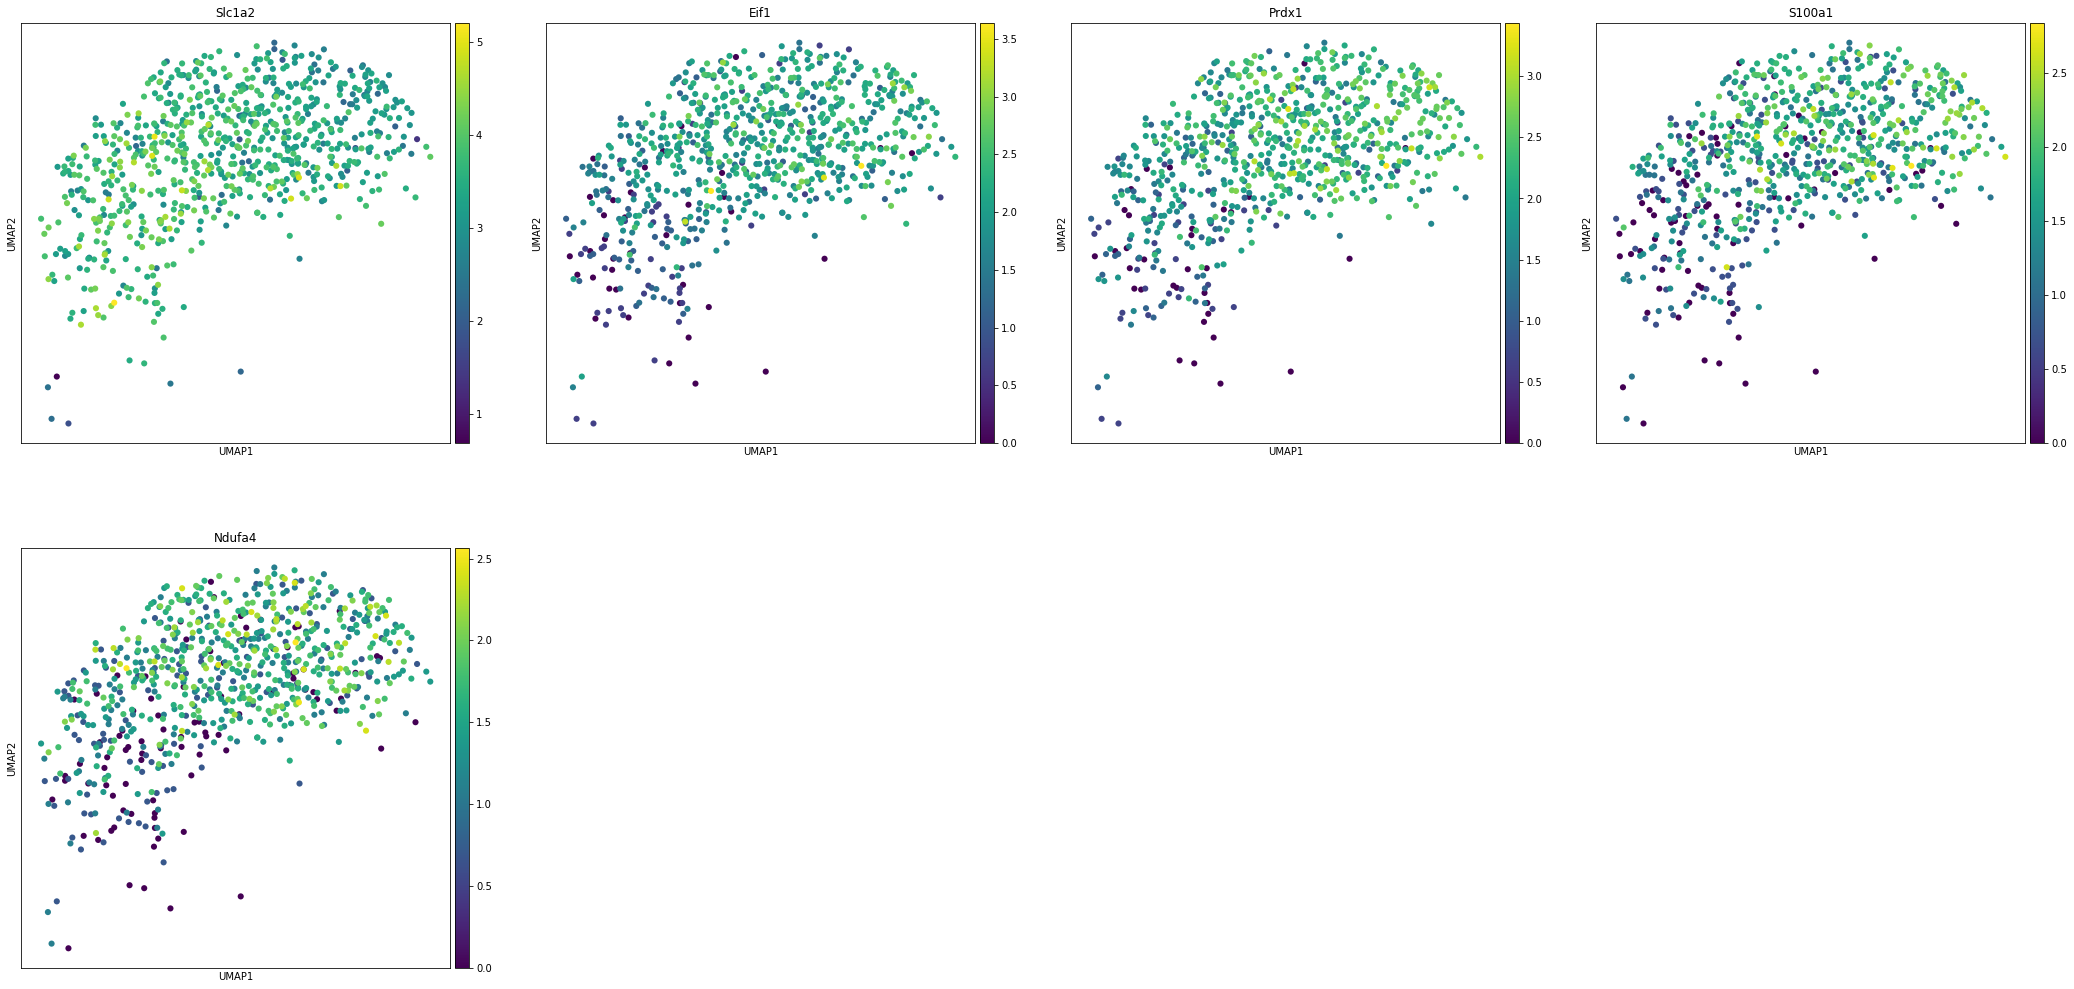

In [51]:
sc.pl.umap(adata_RA, color=['Slc1a2', 'Eif1', 'Prdx1', 'S100a1', 'Ndufa4'], use_raw=True)

### OxPhos genes

In [52]:
oxphos_genes = ["Abcd1",
"Actn3",
"Actn3",
"Afg1l",
"Ak4",
"Apoc3",
"Atp5a1",
"Atp5b",
"Atp5b",
"Atp5c1",
"Atp5d",
"Atp5h",
"Atp5j",
"Atp5j2",
"Atp5l",
"Atp5o",
"Atp5pb",
"Atp7a",
"Atpsckmt",
"Atpsckmt",
"Bdnf",
"Bid",
"Ccnb1",
"Cdk1",
"Chchd10",
"Coq7",
"Coq9",
"Cox4i1",
"Cox4i2",
"Cox5a",
"Cox5b",
"Cox5b",
"Cox6a1",
"Cox6a2",
"Cox7a1",
"Cox7a2",
"Cox7a2l",
"Cox7a2l",
"Cox7c",
"Cyc1",
"Cyc1",
"Cycs",
"Cycs",
"Cyct",
"Cyct",
"Dguok",
"Dld",
"Dnajc15",
"Dnajc30",
"Fxn",
"Fxn",
"Gadd45gip1",
"Iscu",
"Lexm",
"Mecp2",
"Mlxipl",
"Msh2",
"mt-Atp6",
"mt-Co1",
"mt-Co2",
"mt-Co3",
"mt-Cytb",
"mt-Nd2",
"mt-Nd4",
"mt-Nd4",
"mt-Nd4l",
"mt-Nd5",
"Mtch2",
"Myc",
"Myc",
"Myog",
"Ndufa7",
"Ndufa7",
"Ndufa8",
"Ndufa10",
"Ndufa10",
"Ndufa12",
"Ndufaf1",
"Ndufb6",
"Ndufb6",
"Ndufb6",
"Ndufb8",
"Ndufb9",
"Ndufc2",
"Ndufs1",
"Ndufs2",
"Ndufs2",
"Ndufs6",
"Ndufs8",
"Ndufv1",
"Ndufv1",
"Ndufv2",
"Ndufv2",
"Ndufv3",
"Ndufv3",
"Nipsnap2",
"Nupr1",
"Park7",
"Park7",
"Pde2a",
"Pde12",
"Pgk1",
"Pgk2",
"Pink1",
"Pink1",
"Ppif",
"Rhoa",
"Sdha",
"Sdhaf2",
"Sdhaf2",
"Sdhc",
"Sdhd",
"Shmt2",
"Shmt2",
"Shmt2",
"Slc25a23",
"Slc25a33",
"Snca",
"Stoml2",
"Stoml2",
"Surf1",
"Taz",
"Tefm",
"Tnf",
"Uqcc2",
"Uqcc2",
"Uqcc3",
"Uqcc3",
"Uqcr10",
"Uqcrb",
"Uqcrc1",
"Uqcrc1",
"Uqcrfs1",
"Uqcrh",
"Uqcrq",
"Vcp"]

In [53]:
index = []
for gene in oxphos_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_RA.raw.var.index)

In [54]:
len(oxphos_genes)

136

In [57]:
oxphos_genes = list(compress(oxphos_genes, index))

In [58]:
len(oxphos_genes)

129

In [59]:
adata_RA.obs['oxphos_genes_mean'] = np.array(adata_RA.raw[:,oxphos_genes].X.mean(axis=1)).flatten()

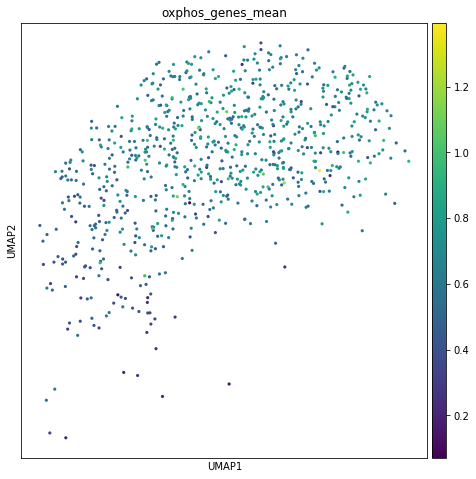

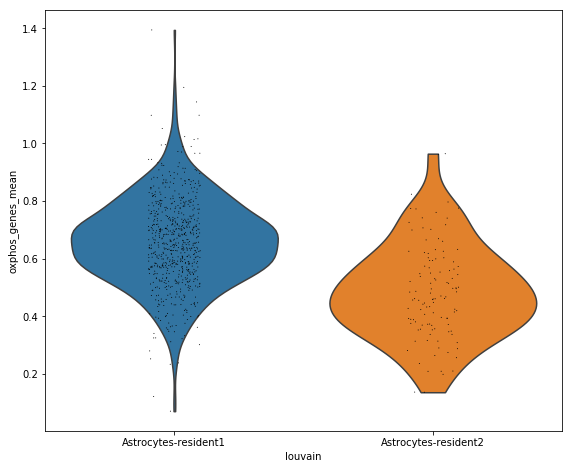

In [61]:
sc.pl.umap(adata_RA, color='oxphos_genes_mean', size=40, 
#          save='_experimental_MT_oxphos_129genes.pdf'
          )
sc.pl.violin(adata_RA, keys='oxphos_genes_mean', groupby='louvain', save='_lowMito_RA_oxphos.pdf')

In [64]:
# Taken from https://www.frontiersin.org/articles/10.3389/fncel.2016.00215/full
astrocyte_markers = ['Aldoc', 'Aqp4', 'Aldh1l1', 'Gja1', 'Gfap', 'Slc1a2', 'Slc1a3', 'Nfia', 'Nes', 'Pygb', 'S100b', 'Vim']

In [65]:
index = []
for gene in astrocyte_markers:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_RA.raw.var.index)

In [66]:
len(astrocyte_markers)

12

In [67]:
astrocyte_markers = list(compress(astrocyte_markers, index))

In [68]:
len(astrocyte_markers)

12

In [69]:
adata_RA.obs['astrocyte_markers_mean'] = np.array(adata_RA.raw[:,astrocyte_markers].X.mean(axis=1)).flatten()

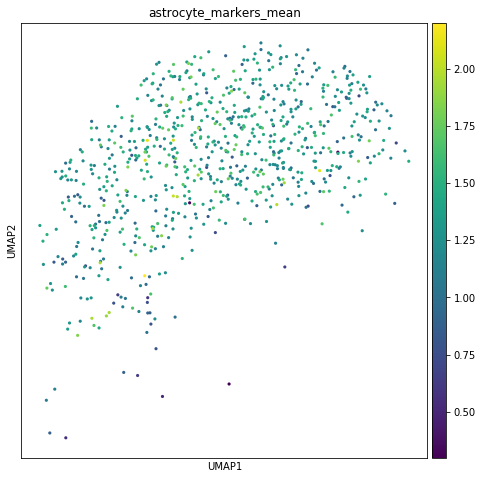

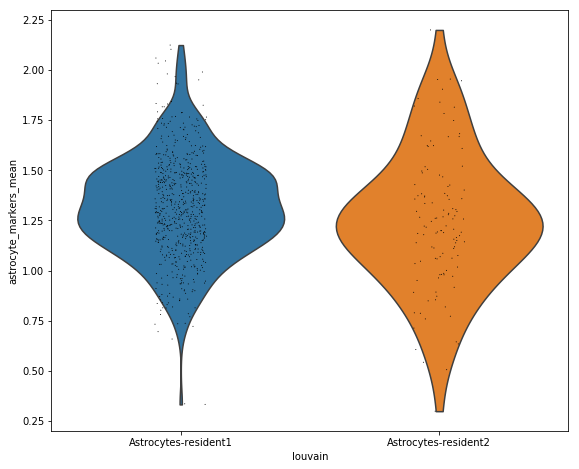

In [70]:
sc.pl.umap(adata_RA, color='astrocyte_markers_mean', size=40, 
          save='_experimental_MT_astrocyte_markers_mean.pdf')
sc.pl.violin(adata_RA, keys='astrocyte_markers_mean', groupby='louvain', save='_lowMito_RA_astroMarkers.pdf')

### Remove high mito cells

## Q2: How does the new gene cluster 10 express in control vs DLX2 cells? 

In [7]:
adata_experiment_neural = sc.read(neural_data_dir + 'BL41-42Only_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')

In [8]:
gene_data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/Gene_clusters/'

In [9]:
input_path = gene_data_dir + 'adata_genes_Manuscript_v2'
with open(input_path, 'rb') as input_file:
 
    adata_genes = pickle.load(input_file)

In [10]:
adata_genes

AnnData object with n_obs × n_vars = 2469 × 4601 
    obs: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'p_val_adj', 'n_counts', 'n_cells_experimental', 'louvain', 'log10_n_cells_experimental'
    var: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime', 'Rpl32', 'Egfr'
    uns: 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [13]:
genes_c10 = adata_genes.obs.index[adata_genes.obs['louvain']=='10']

In [19]:
genes_c10

Index(['Stat1', 'Serping1', 'B2m', 'Zbp1', 'Cp', 'Gbp7', 'Gbp3', 'Gbp2',
       'Ifi44', 'Ddx58', 'Isg15', 'Oasl2', 'Samd9l', 'Herc6', 'A2m', 'Trim30a',
       'Ifitm3', 'Irf7', 'Bst2', 'Psmb10', 'Ifi47', 'Igtp', 'Irgm2', 'Xaf1',
       'Slfn8', 'Ifi35', 'Rnf213', 'Ly6e', 'Ly6a', 'Rtp4', 'Parp14', 'Tapbp',
       'H2-K1', 'H2-DMa', 'H2-DMb1', 'Psmb9', 'Tap1', 'Psmb8', 'Tap2',
       'H2-Ab1', 'H2-Aa', 'H2-Eb1', 'H2-D1', 'H2-Q4', 'H2-Q6', 'H2-Q7',
       'H2-T23', 'H2-T22', 'H2-M3', 'Eif2ak2', 'Gm4951', 'Gm4841', 'Iigp1',
       'Cd74', 'Ifit3', 'Ifit1'],
      dtype='object')

In [21]:
adata_experiment_neural.obs['cluster10_genes_mean'] = np.array(adata_experiment_neural.raw[:,genes_c10.tolist()].X.mean(axis=1)).flatten()

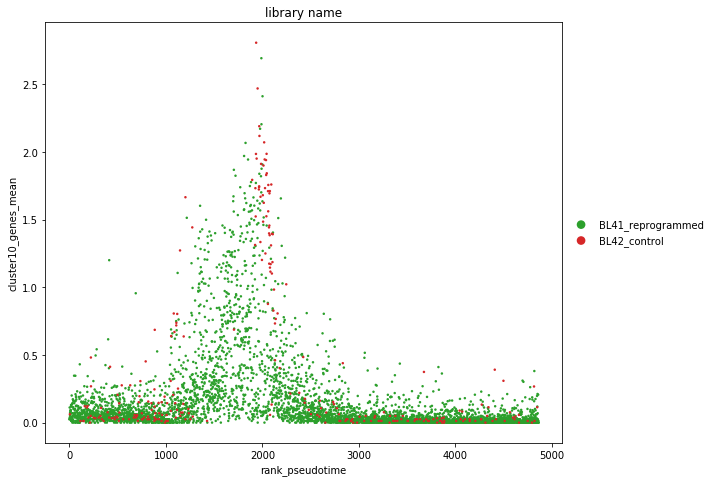

In [24]:
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='cluster10_genes_mean', color='library_name')

## Q5: Are metabolic state-specific genes regulated during reprogramming? 

In [7]:
from itertools import compress

In [8]:
adata_experiment_neural = sc.read(neural_data_dir + 'BL41-42Only_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')

In [9]:
adata_experiment_neural

AnnData object with n_obs × n_vars = 4863 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

### Glycolytic genes

In [21]:
glycolytic_genes = ['Hk2', 'Ldha', 'Pdk1', 'Pkm']

In [25]:
for gene in glycolytic_genes:
    print (gene in adata_experiment_neural.raw.var.index)

True
True
True
True


In [26]:
adata_experiment_neural.obs['glycolytic_genes_mean'] = np.array(adata_experiment_neural.raw[:,glycolytic_genes].X.mean(axis=1)).flatten()

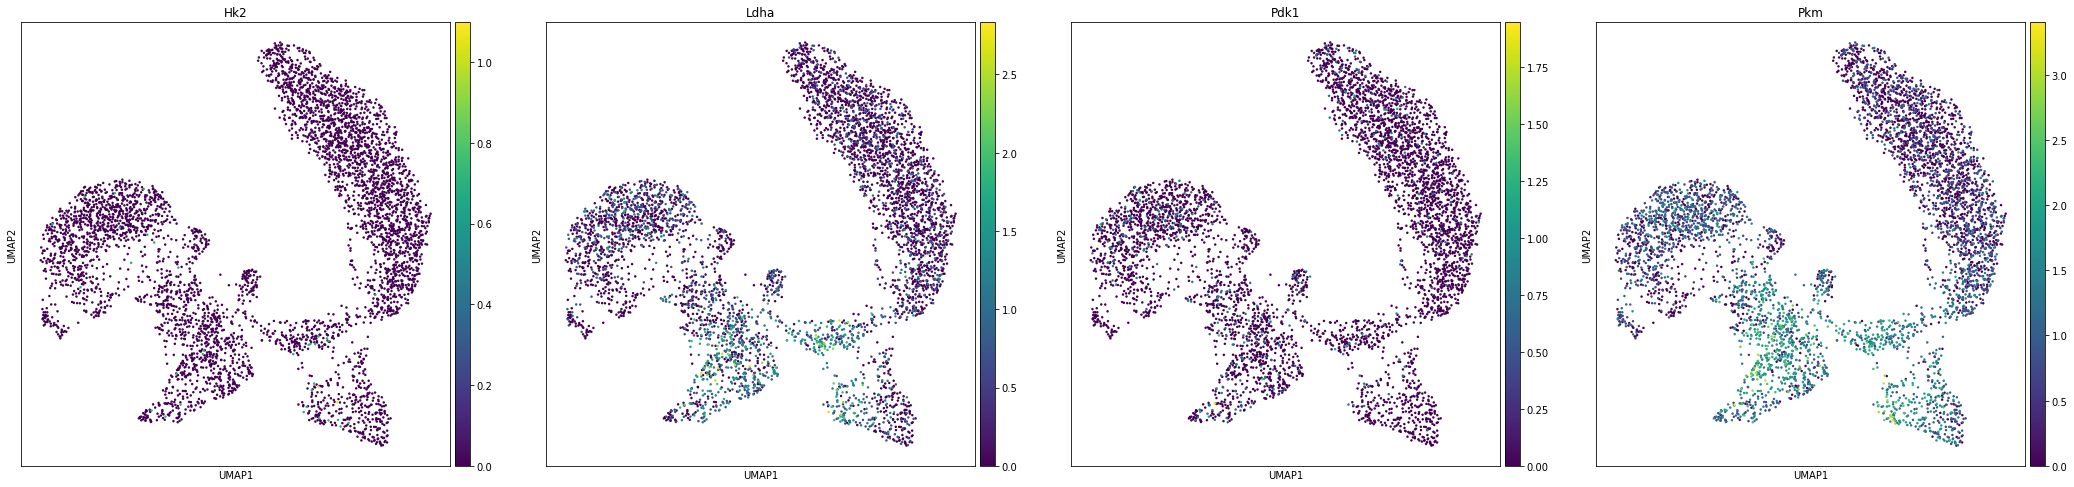

In [27]:
sc.pl.umap(adata_experiment_neural, color=glycolytic_genes, use_raw=True, 
          # save='_A1_astrocyte_markers.pdf'
          )

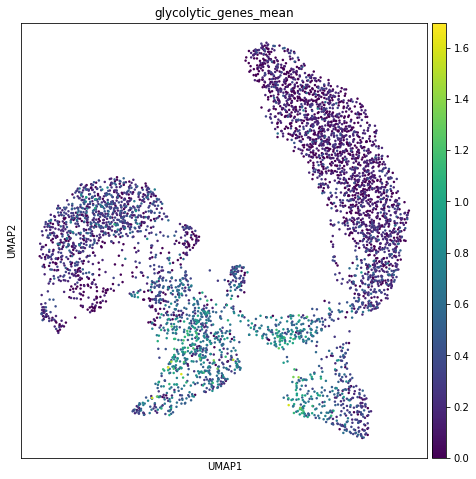

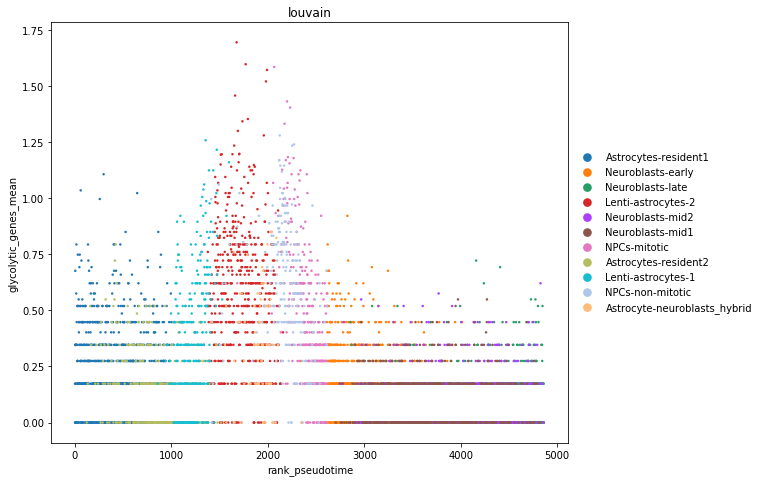

In [29]:
sc.pl.umap(adata_experiment_neural, color='glycolytic_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='glycolytic_genes_mean', color='louvain', use_raw=True)

### OxPhos genes

In [10]:
oxphos_genes = ["Abcd1",
"Actn3",
"Actn3",
"Afg1l",
"Ak4",
"Apoc3",
"Atp5a1",
"Atp5b",
"Atp5b",
"Atp5c1",
"Atp5d",
"Atp5h",
"Atp5j",
"Atp5j2",
"Atp5l",
"Atp5o",
"Atp5pb",
"Atp7a",
"Atpsckmt",
"Atpsckmt",
"Bdnf",
"Bid",
"Ccnb1",
"Cdk1",
"Chchd10",
"Coq7",
"Coq9",
"Cox4i1",
"Cox4i2",
"Cox5a",
"Cox5b",
"Cox5b",
"Cox6a1",
"Cox6a2",
"Cox7a1",
"Cox7a2",
"Cox7a2l",
"Cox7a2l",
"Cox7c",
"Cyc1",
"Cyc1",
"Cycs",
"Cycs",
"Cyct",
"Cyct",
"Dguok",
"Dld",
"Dnajc15",
"Dnajc30",
"Fxn",
"Fxn",
"Gadd45gip1",
"Iscu",
"Lexm",
"Mecp2",
"Mlxipl",
"Msh2",
"mt-Atp6",
"mt-Co1",
"mt-Co2",
"mt-Co3",
"mt-Cytb",
"mt-Nd2",
"mt-Nd4",
"mt-Nd4",
"mt-Nd4l",
"mt-Nd5",
"Mtch2",
"Myc",
"Myc",
"Myog",
"Ndufa7",
"Ndufa7",
"Ndufa8",
"Ndufa10",
"Ndufa10",
"Ndufa12",
"Ndufaf1",
"Ndufb6",
"Ndufb6",
"Ndufb6",
"Ndufb8",
"Ndufb9",
"Ndufc2",
"Ndufs1",
"Ndufs2",
"Ndufs2",
"Ndufs6",
"Ndufs8",
"Ndufv1",
"Ndufv1",
"Ndufv2",
"Ndufv2",
"Ndufv3",
"Ndufv3",
"Nipsnap2",
"Nupr1",
"Park7",
"Park7",
"Pde2a",
"Pde12",
"Pgk1",
"Pgk2",
"Pink1",
"Pink1",
"Ppif",
"Rhoa",
"Sdha",
"Sdhaf2",
"Sdhaf2",
"Sdhc",
"Sdhd",
"Shmt2",
"Shmt2",
"Shmt2",
"Slc25a23",
"Slc25a33",
"Snca",
"Stoml2",
"Stoml2",
"Surf1",
"Taz",
"Tefm",
"Tnf",
"Uqcc2",
"Uqcc2",
"Uqcc3",
"Uqcc3",
"Uqcr10",
"Uqcrb",
"Uqcrc1",
"Uqcrc1",
"Uqcrfs1",
"Uqcrh",
"Uqcrq",
"Vcp"]

In [11]:
index = []
for gene in oxphos_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [12]:
len(oxphos_genes)

136

In [13]:
oxphos_genes = list(compress(oxphos_genes, index))

In [14]:
len(oxphos_genes)

129

In [15]:
adata_experiment_neural.obs['oxphos_genes_mean'] = np.array(adata_experiment_neural.raw[:,oxphos_genes].X.mean(axis=1)).flatten()

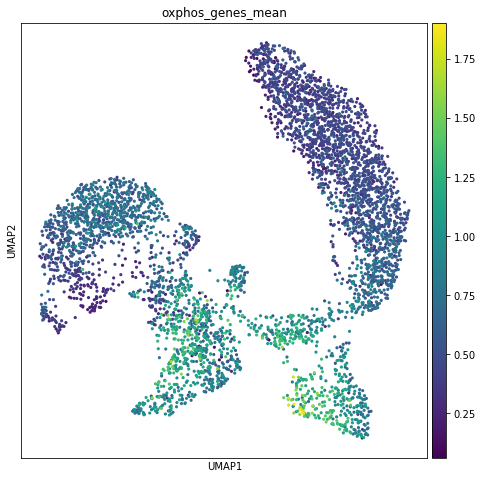

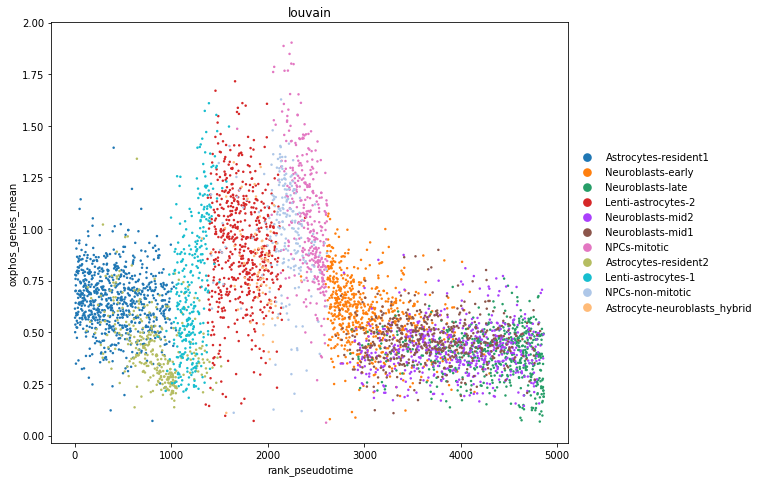

In [16]:
sc.pl.umap(adata_experiment_neural, color='oxphos_genes_mean', size=40, 
          save='_experimental_MT_oxphos_129genes.pdf')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='oxphos_genes_mean', color='louvain', use_raw=True)

In [43]:
oxphos_genes_known = ['Ppargc1a', 'Esrrg']

In [44]:
for gene in oxphos_genes_known:
    print (gene in adata_experiment_neural.raw.var.index)

True
True


In [45]:
adata_experiment_neural.obs['oxphos_genes_known_mean'] = np.array(adata_experiment_neural.raw[:,oxphos_genes_known].X.mean(axis=1)).flatten()

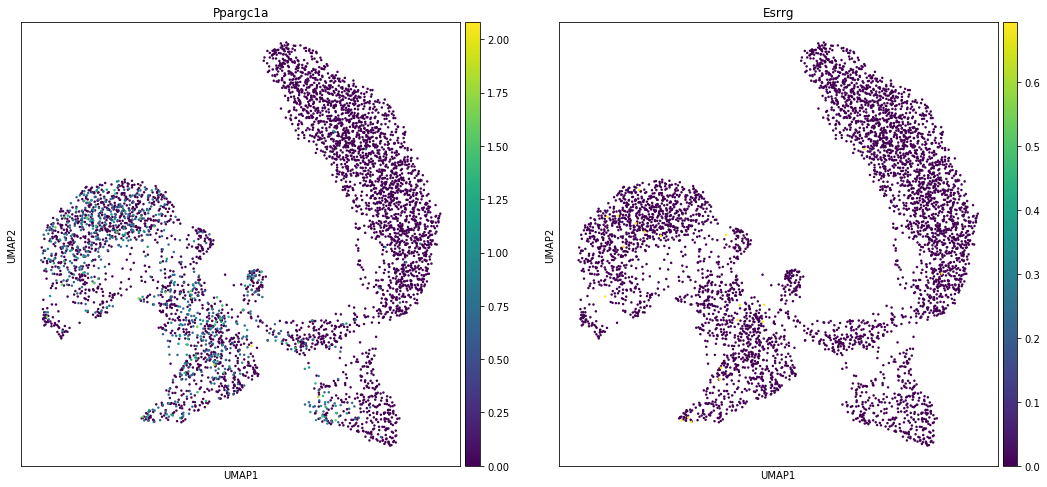

In [46]:
sc.pl.umap(adata_experiment_neural, color=oxphos_genes_known, use_raw=True, 
          # save='_A1_astrocyte_markers.pdf'
          )

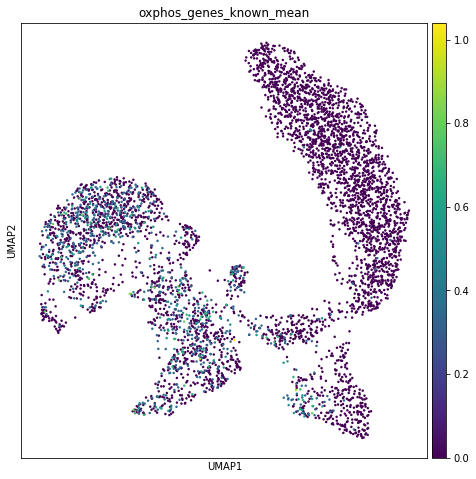

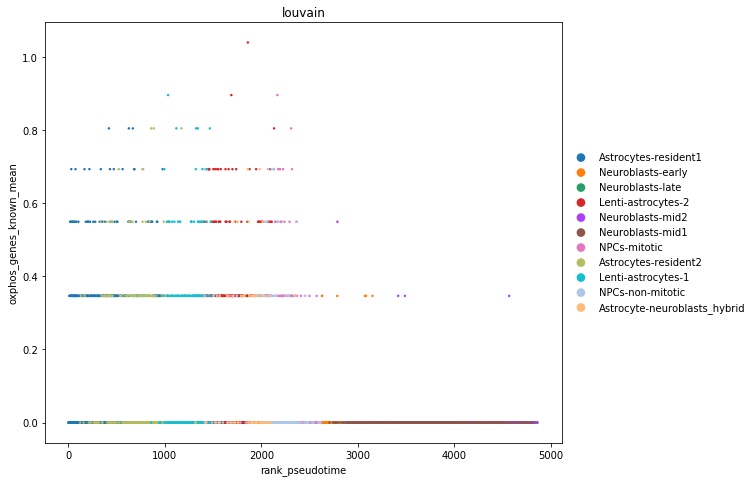

In [48]:
sc.pl.umap(adata_experiment_neural, color='oxphos_genes_known_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='oxphos_genes_known_mean', color='louvain', use_raw=True)

In [49]:
complex_I_genes = ["Ndufa7",
"Ndufa7",
"Ndufa8",
"Ndufa10",
"Ndufa10",
"Ndufa12",
"Ndufaf1",
"Ndufb6",
"Ndufb6",
"Ndufb6",
"Ndufb8",
"Ndufb9",
"Ndufc2",
"Ndufs1",
"Ndufs2",
"Ndufs2",
"Ndufs6",
"Ndufs8",
"Ndufv1",
"Ndufv1",
"Ndufv2",
"Ndufv2",
"Ndufv3",
"Ndufv3"]

In [50]:
index = []
for gene in complex_I_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [51]:
len(complex_I_genes)

24

In [52]:
complex_I_genes = list(compress(complex_I_genes, index))

In [54]:
len(complex_I_genes)

24

In [55]:
adata_experiment_neural.obs['complex_I_genes_mean'] = np.array(adata_experiment_neural.raw[:,complex_I_genes].X.mean(axis=1)).flatten()

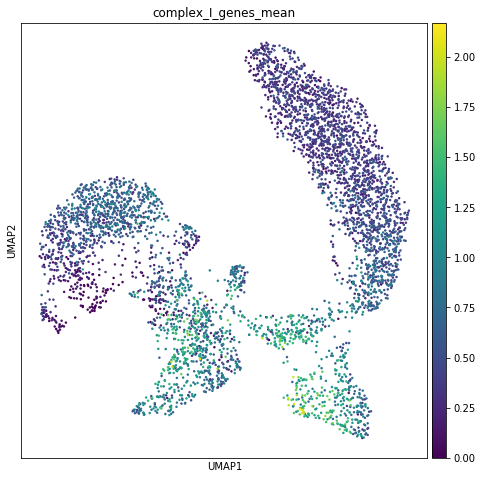

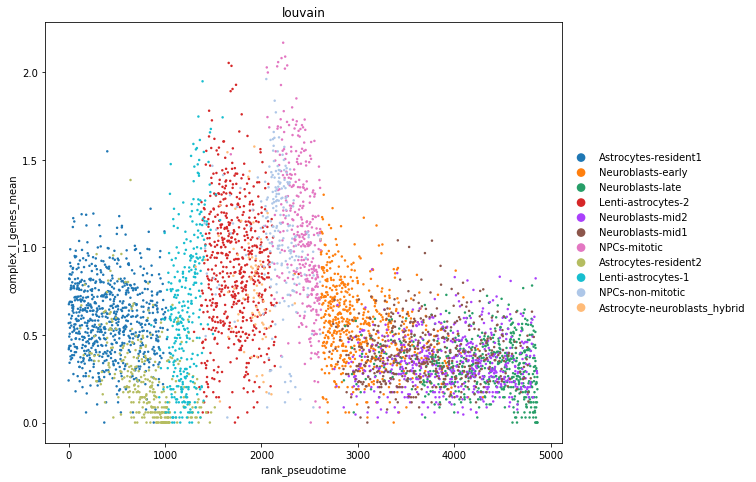

In [56]:
sc.pl.umap(adata_experiment_neural, color='complex_I_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='complex_I_genes_mean', color='louvain', use_raw=True)

In [57]:
complex_II_genes = ["Sdha",
"Sdhaf2",
"Sdhaf2",
"Sdhc",
"Sdhd"]

In [58]:
index = []
for gene in complex_II_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [59]:
len(complex_II_genes)

5

In [60]:
complex_II_genes = list(compress(complex_II_genes, index))

In [61]:
len(complex_II_genes)

5

In [62]:
adata_experiment_neural.obs['complex_II_genes_mean'] = np.array(adata_experiment_neural.raw[:,complex_II_genes].X.mean(axis=1)).flatten()

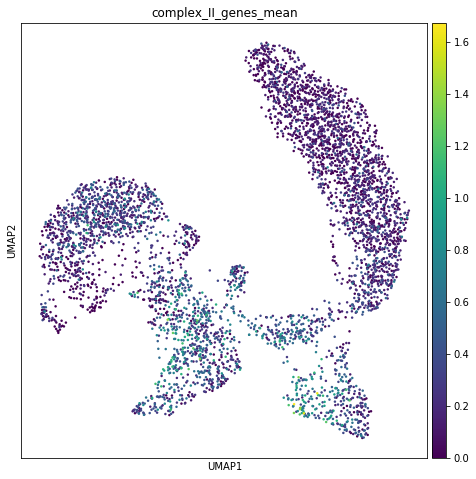

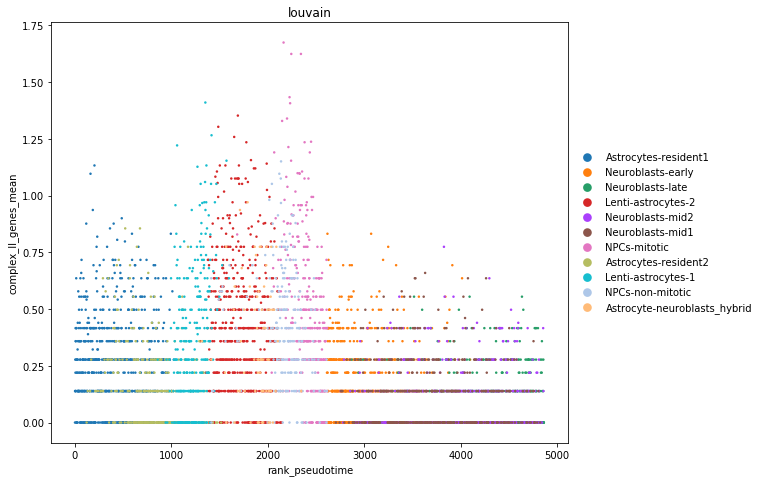

In [63]:
sc.pl.umap(adata_experiment_neural, color='complex_II_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='complex_II_genes_mean', color='louvain', use_raw=True)

In [66]:
complex_III_genes = ["Uqcc2",
"Uqcc2",
"Uqcc3",
"Uqcc3",
"Uqcr10",
"Uqcrb",
"Uqcrc1",
"Uqcrc1",
"Uqcrfs1",
"Uqcrh",
"Uqcrq",
"Cyc1",
"Cycs",]

In [67]:
index = []
for gene in complex_III_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [68]:
len(complex_III_genes)

13

In [69]:
complex_III_genes = list(compress(complex_III_genes, index))

In [70]:
len(complex_III_genes)

13

In [71]:
adata_experiment_neural.obs['complex_III_genes_mean'] = np.array(adata_experiment_neural.raw[:,complex_III_genes].X.mean(axis=1)).flatten()

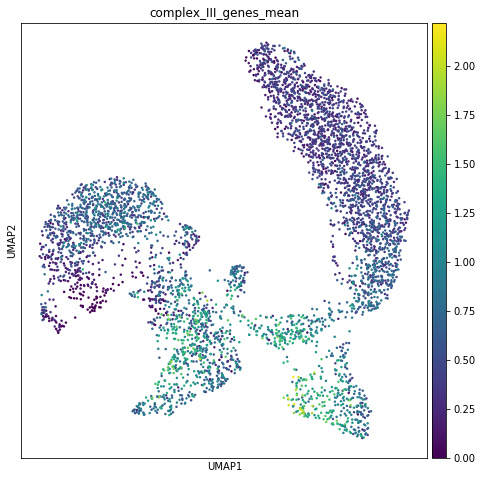

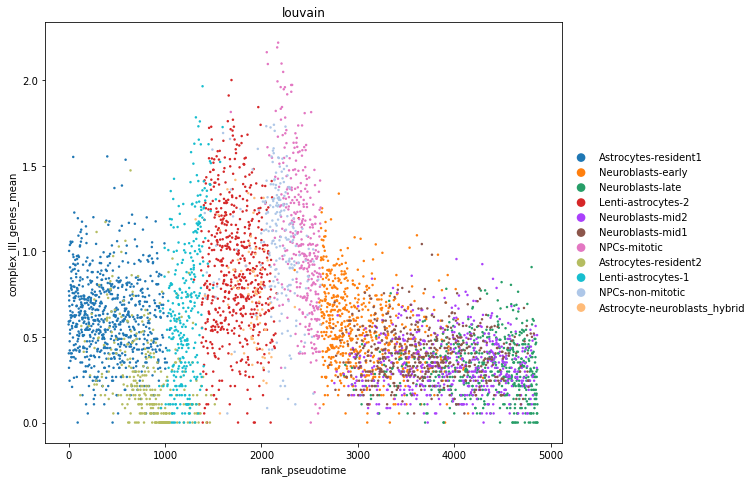

In [72]:
sc.pl.umap(adata_experiment_neural, color='complex_III_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='complex_III_genes_mean', color='louvain', use_raw=True)

In [74]:
complex_IV_genes = ["Cox4i1",
"Cox4i2",
"Cox5a",
"Cox5b",
"Cox5b",
"Cox6a1",
"Cox6a2",
"Cox7a1",
"Cox7a2",
"Cox7a2l",
"Cox7a2l",
"Cox7c",]

In [75]:
index = []
for gene in complex_IV_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [76]:
len(complex_IV_genes)

12

In [77]:
complex_IV_genes = list(compress(complex_IV_genes, index))

In [78]:
len(complex_IV_genes)

12

In [79]:
adata_experiment_neural.obs['complex_IV_genes_mean'] = np.array(adata_experiment_neural.raw[:,complex_IV_genes].X.mean(axis=1)).flatten()

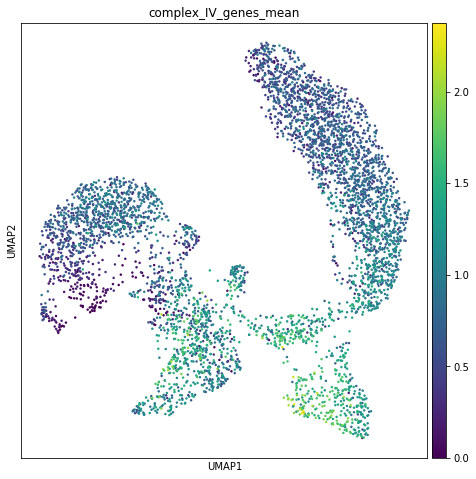

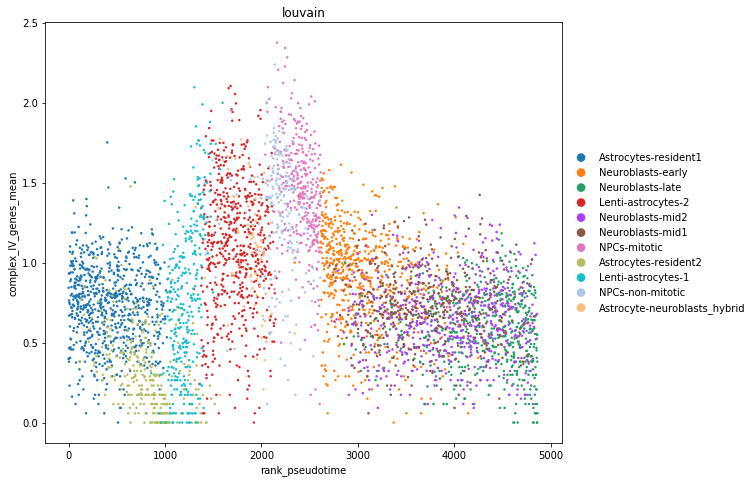

In [80]:
sc.pl.umap(adata_experiment_neural, color='complex_IV_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='complex_IV_genes_mean', color='louvain', use_raw=True)

In [81]:
complex_V_genes = ["Atp5a1",
"Atp5b",
"Atp5b",
"Atp5c1",
"Atp5d",
"Atp5h",
"Atp5j",
"Atp5j2",
"Atp5l",
"Atp5o",
"Atp5pb",
"Atp7a",]

In [82]:
index = []
for gene in complex_V_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [83]:
len(complex_V_genes)

12

In [84]:
complex_V_genes = list(compress(complex_V_genes, index))

In [85]:
len(complex_V_genes)

11

In [86]:
adata_experiment_neural.obs['complex_V_genes_mean'] = np.array(adata_experiment_neural.raw[:,complex_V_genes].X.mean(axis=1)).flatten()

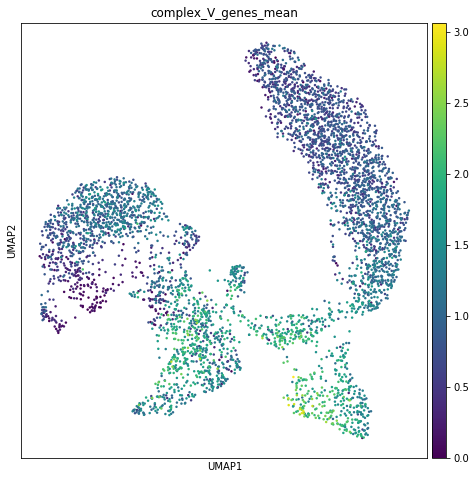

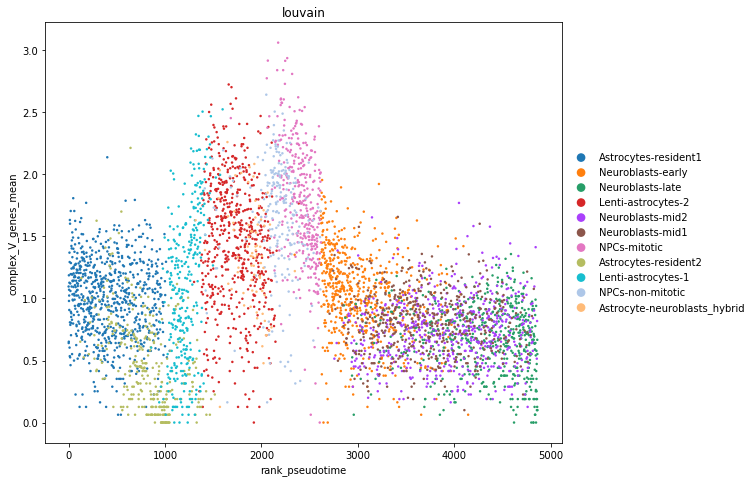

In [87]:
sc.pl.umap(adata_experiment_neural, color='complex_V_genes_mean')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='complex_V_genes_mean', color='louvain', use_raw=True)

## Q7: are the two NPC populations distinguished by phase of cell cycle?

In [1]:
from itertools import compress

In [17]:
adata_experiment_neural = sc.read(neural_data_dir + 'BL41-42Only_NeuralOnly_postFiltering_log_pcs50_Harmony_louvain_anno_pseudotime.h5ad')

In [18]:
adata_experiment_neural

AnnData object with n_obs × n_vars = 4863 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

### G1/S genes

In [19]:
G1_S_genes = ['Mcm5',
'Pcna',
'Tyms',
'Fen1',
'Mcm2',
'Mcm4',
'Rrm1',
'Ung',
'Gins2',
'Mcm6',
'Cdca7',
'Dtl',
'Prim1',
'Uhrf1',
'Cenpu',
'Hells',
'Rfc2',
'Rpa2',
'Nasp',
'Rad51ap1',
'Gmnn',
'Wdr76',
'Slbp',
'Ccne2',
'Ubr7',
'Pold3',
'Msh2',
'Atad2',
'Rad51',
'Rrm2',
'Cdc45',
'Cdc6',
'Exo1',
'Tipin',
'Dscc1',
'Blm',
'Casp8ap2',
'Usp1',
'Clspn',
'Pola1',
'Chaf1b',
'Brip1',
'E2f8']

In [20]:
index = []
for gene in G1_S_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [21]:
len(G1_S_genes)

43

In [22]:
G1_S_genes = list(compress(G1_S_genes, index))

In [23]:
len(G1_S_genes)

43

In [24]:
adata_experiment_neural.obs['G1_S_genes_mean'] = np.array(adata_experiment_neural.raw[:,G1_S_genes].X.mean(axis=1)).flatten()

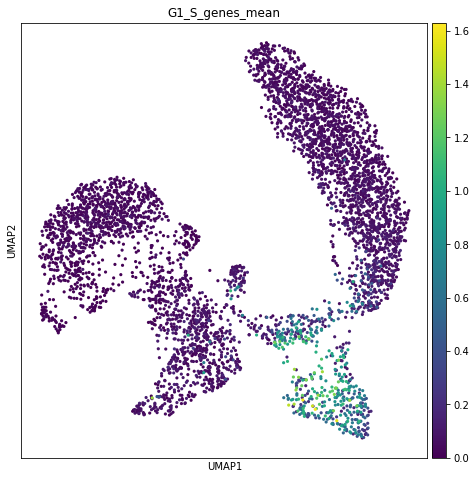

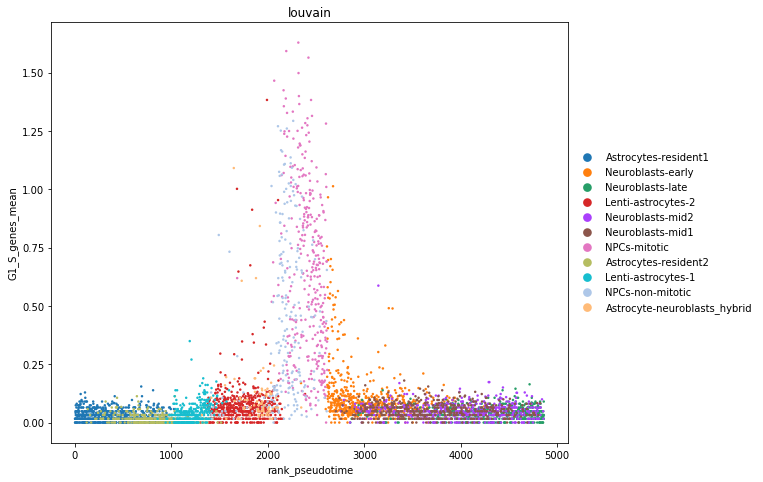

In [36]:
sc.pl.umap(adata_experiment_neural, color='G1_S_genes_mean', size=40, save='_G1_S_genes_mean.pdf')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='G1_S_genes_mean', color='louvain', use_raw=True)

### G2/M genes

In [26]:
G2_M_genes = ['Hmgb2',
'Cdk1',
'Nusap1',
'Ube2c',
'Birc5',
'Tpx2',
'Top2a',
'Ndc80',
'Cks2',
'Nuf2',
'Cks1b',
'Mki67',
'Tmpo',
'Cenpf',
'Tacc3',
'Pimreg',
'Smc4',
'Ccnb2',
'Ckap2l',
'Ckap2',
'Aurkb',
'Bub1',
'Kif11',
'Anp32e',
'Tubb4b',
'Gtse1',
'Kif20b',
'Hjurp',
'A730008H23Rik',
'Cdca3',
'Cdc20',
'Ttk',
'Cdc25c',
'Kif2c',
'Rangap1',
'Ncapd2',
'Dlgap5',
'Cdca2',
'Cdca8',
'Ect2',
'Kif23',
'Hmmr',
'Aurka',
'Psrc1',
'Anln',
'Lbr',
'Ckap5',
'Cenpe',
'Ctcf',
'Nek2',
'G2e3',
'Gas2l3',
'Cbx5',
'Cenpa']

In [27]:
index = []
for gene in G2_M_genes:
#     print (gene in adata_experiment_neural.raw.var.index)
    index.append(gene in adata_experiment_neural.raw.var.index)

In [28]:
len(G2_M_genes)

54

In [29]:
G2_M_genes = list(compress(G2_M_genes, index))

In [30]:
len(G2_M_genes)

53

In [31]:
adata_experiment_neural.obs['G2_M_genes_mean'] = np.array(adata_experiment_neural.raw[:,G2_M_genes].X.mean(axis=1)).flatten()

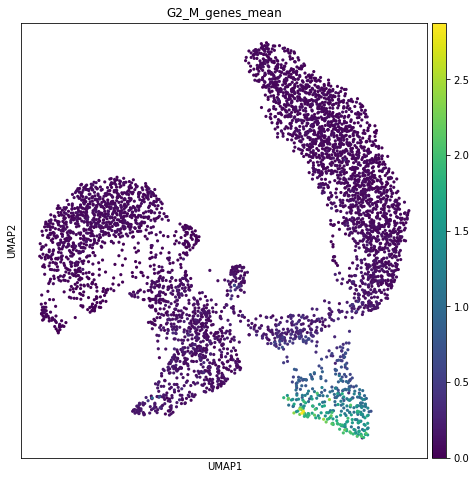

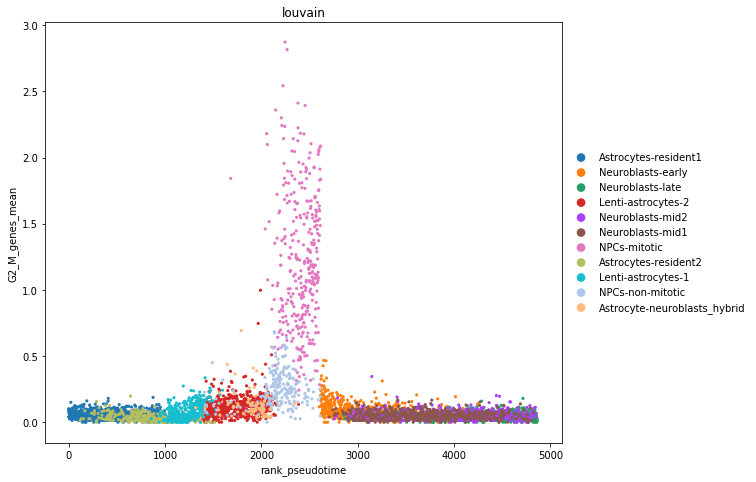

In [35]:
sc.pl.umap(adata_experiment_neural, color='G2_M_genes_mean', size=40, save='G2_M_genes_mean.pdf')
sc.pl.scatter(adata_experiment_neural, x='rank_pseudotime', y='G2_M_genes_mean', color='louvain', use_raw=True, size=40)

### Do clusters 1, 6, and 8 genes overlap with these groups? 

In [2]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [3]:
gene_data_dir = '/project/GCRB/Hon_lab/s418610/Projects/03.Invivo_neuronal_reprogramming/analysis/Cluster_with_10X_20k/data/10x_remapped/PipelineOrganized_v1/Gene_clusters/'

In [11]:
input_path = gene_data_dir + 'adata_genes_Manuscript_v2'
with open(input_path, 'rb') as input_file:
 
    adata_genes = pickle.load(input_file)

In [12]:
adata_genes

AnnData object with n_obs × n_vars = 2469 × 4601 
    obs: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'p_val_adj', 'n_counts', 'n_cells_experimental', 'louvain', 'log10_n_cells_experimental'
    var: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime', 'Rpl32', 'Egfr'
    uns: 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [14]:
gene_index = adata_genes.obs.index[adata_genes.obs['louvain']=='6']

In [15]:
len(gene_index)

135

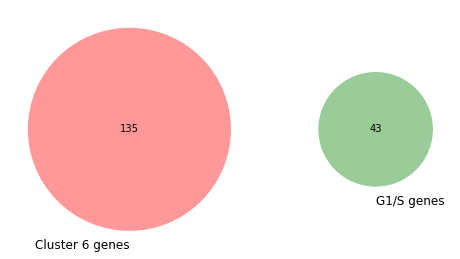

In [19]:
AB = len(intersection(G1_S_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G1_S_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 6 genes', 
                        'G1/S genes'))

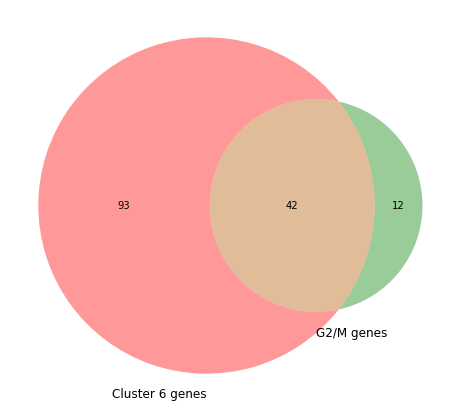

In [20]:
AB = len(intersection(G2_M_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G2_M_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 6 genes', 
                        'G2/M genes'))

In [21]:
gene_index = adata_genes.obs.index[adata_genes.obs['louvain']=='8']

In [22]:
len(gene_index)

91

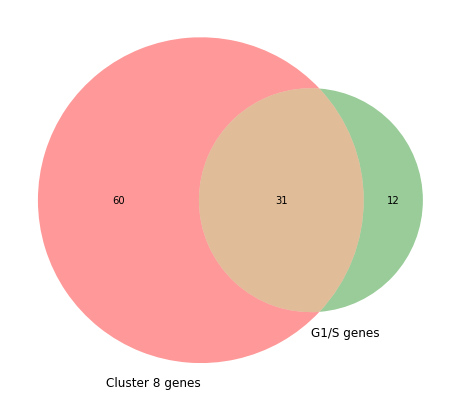

In [23]:
AB = len(intersection(G1_S_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G1_S_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 8 genes', 
                        'G1/S genes'))

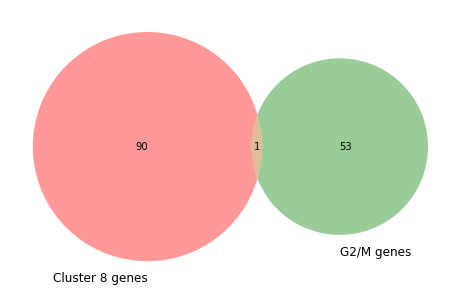

In [24]:
AB = len(intersection(G2_M_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G2_M_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 8 genes', 
                        'G2/M genes'))

In [25]:
gene_index = adata_genes.obs.index[adata_genes.obs['louvain']=='1']

In [26]:
len(gene_index)

313

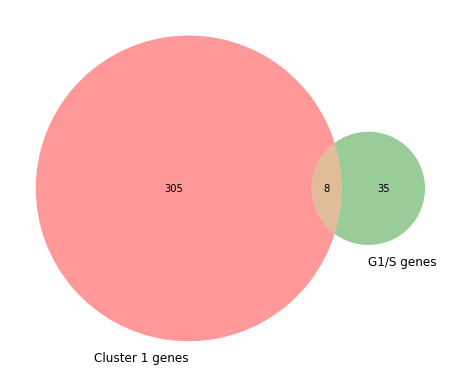

In [27]:
AB = len(intersection(G1_S_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G1_S_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 1 genes', 
                        'G1/S genes'))

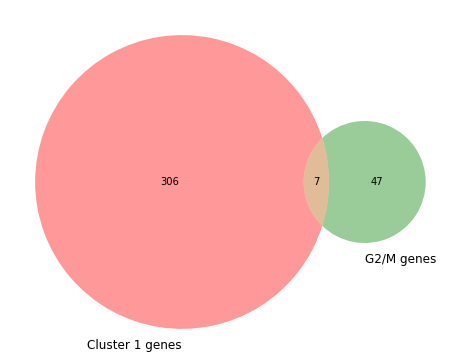

In [28]:
AB = len(intersection(G2_M_genes, gene_index))

Ab = len(gene_index) - AB
aB = len(G2_M_genes) - AB

venn2(subsets = (Ab, aB, AB), 
              set_labels = ('Cluster 1 genes', 
                        'G2/M genes'))

## Messing around

In [8]:
adata_experiment_neural

AnnData object with n_obs × n_vars = 4863 × 2499 
    obs: 'library_name', 'batch', 'lenti_count', 'lenti_log1p_count', 'tdT_count', 'tdT_log1p_count', 'n_counts', 'log_counts', 'n_genes', 'mt_count', 'mt_frac', 'n_counts_all', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts'
    uns: 'diffmap_evals', 'iroot', 'library_name_colors', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'Harmony', 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [12]:
adata_experiment_neural.obsm['X_umap'].shape

(4863, 2)

In [11]:
pd.DataFrame(adata_experiment_neural.obsm['X_umap'],index=adata_experiment_neural.obs.index)[0]

index
AAACCCAAGAACGCGT-1   -13.817670
AAACCCACACAGGATG-1     0.081446
AAACCCATCCCACAGG-1    -4.717900
AAACGAAGTGGAGAAA-1    -9.886638
AAACGCTCATTAGGAA-1    -9.103585
                        ...    
TTGTTTGTCAGACAAA-2   -13.501751
TTGTTTGTCGAGCCAC-2    -3.157506
TTTCGATAGATGCTGG-2    -0.794163
TTTGGTTCATCTCAAG-2    -2.151833
TTTGTTGTCTCCTGCA-2   -12.120340
Name: 0, Length: 4863, dtype: float32